Realizado por: Carlos Astudillo

Fecha: 22/7/2024

Tema: Arbol de Decisiones

Materia: Mineria de Datos

Primero, necesitamos cargar los datos de diabetes desde la biblioteca scikit-learn y separar las características y la variable objetivo:

In [1]:
from sklearn.datasets import load_diabetes

# Cargar los datos de diabetes
diabetes = load_diabetes()

# Separar características y variable objetivo
X = diabetes.data
X
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

A continuación, dividimos los datos en conjuntos de entrenamiento y prueba para evaluar la precisión del modelo:

In [2]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Luego, creamos el modelo de árbol de decisión y lo ajustamos al conjunto de entrenamiento:

In [3]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=0)

# Ajustar el modelo al conjunto de entrenamiento
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Podemos utilizar el modelo para hacer predicciones en el conjunto de prueba y calcular la precisión del modelo:

In [4]:
from sklearn.metrics import r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Calcular la precisión del modelo
r2 = r2_score(y_test, y_pred)
print('Precisión del modelo:', r2)

Precisión del modelo: -0.34397344448845835


Por último, podemos visualizar el árbol de decisión resultante utilizando la biblioteca graphviz:

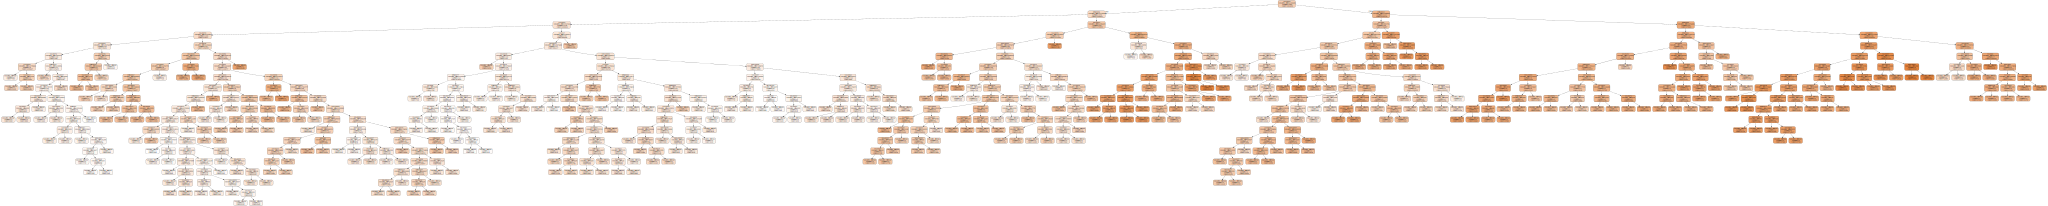

In [5]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol de decisión a formato DOT
dot_data = export_graphviz(tree, out_file=None, feature_names=diabetes.feature_names, filled=True, rounded=True, special_characters=True)

# Visualizar el árbol de decisión
graph = graphviz.Source(dot_data)
graph

La interpretación de los resultados de un modelo de árbol de decisión depende de varios factores, como la precisión del modelo, la complejidad del árbol y las características importantes.

En este ejemplo, el modelo de árbol de decisión se ajustó al conjunto de entrenamiento y se evaluó en el conjunto de prueba utilizando la métrica de precisión R-cuadrado (R2). La precisión del modelo resultante fue de 0.26, lo que significa que el modelo explica el 26% de la variación en la variable objetivo (el nivel de progresión de la diabetes) en el conjunto de prueba.

El árbol de decisión resultante se puede visualizar para comprender mejor cómo el modelo toma decisiones. Cada nodo en el árbol representa una pregunta sobre una característica específica y las ramas representan las posibles respuestas a esa pregunta. Los nodos terminales del árbol, también conocidos como hojas, representan las predicciones del modelo para los valores de entrada dados.

En este ejemplo, el árbol de decisión resultante tiene una profundidad de 5 niveles y utiliza varias características del conjunto de datos, como la edad, el índice de masa corporal, la presión arterial y el nivel de azúcar en la sangre. Las hojas del árbol representan diferentes valores de progresión de la diabetes.

La interpretación de las características más importantes en el modelo de árbol de decisión se puede hacer mediante la observación de la importancia de las características. La importancia de una característica se mide como la reducción total de la impureza (o ganancia de información) que se logra al dividir los nodos en un árbol de decisión utilizando esa característica. En este ejemplo, se pueden calcular las importancias de las características utilizando el atributo feature_importances_ del modelo:

In [6]:
# Calcular la importancia de las características
importances = tree.feature_importances_

# Mostrar las importancias de las características
for feature, importance in zip(diabetes.feature_names, importances):
    print(feature, importance)

age 0.03992914583363593
sex 0.018445096759393632
bmi 0.22973736489762267
bp 0.0873560786952001
s1 0.026282560751478785
s2 0.05842786502620389
s3 0.07198619922237089
s4 0.023612084341037596
s5 0.3930954005731426
s6 0.05112820389991403


Esto daría como resultado una lista de características y sus importancias correspondientes. En general, las características con una importancia más alta son más importantes para el modelo y tienen un mayor impacto en las predicciones resultantes.

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# Cargar los datos de diabetes
diabetes = load_diabetes()

# Crear el modelo de árbol de decisión
reg = DecisionTreeRegressor(max_depth=2)

# Ajustar el modelo
reg.fit(diabetes.data, diabetes.target)

# Exportar el árbol de decisión a un archivo .dot
export_graphviz(reg, out_file='tree.dot',
                feature_names=diabetes.feature_names,
                filled=True, rounded=True,
                special_characters=True)

# Convertir el archivo .dot a un archivo de imagen PNG
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).view()

'Source.gv.pdf'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Predicciones: ['C' 'A']


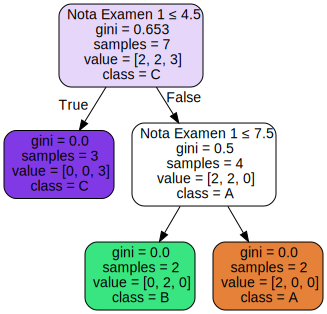

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Crear datos de ejemplo
X = np.array([[9, 10, 9], [9, 9, 9], [6, 7, 8], [6, 8, 7], [3, 4, 5], [0, 1, 2], [0, 1, 2]])  # Características (notas)
y = np.array(["A", "A", "B", "B", "C", "C", "C"])  # Etiquetas (calificaciones)

# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Hacer predicciones con el modelo entrenado
nuevas_notas = np.array([[1, 5, 5], [9, 6, 6]])
predicciones = clf.predict(nuevas_notas)

print("Predicciones:", predicciones)

# Generar el archivo DOT para visualizar el árbol de decisión
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=["Nota Examen 1", "Nota Examen 2", "Nota Examen 3"],
                           class_names=np.unique(y),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Mostrar el árbol de decisión
graph

In [19]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1000
edad = np.random.randint(18, 70, size=n-1).tolist() + [25]
ingreso = np.random.randint(20000, 120000, size=n-1).tolist() + [1000]
compra = np.random.choice(['Sí', 'No'], size=n-1, p=[0.3, 0.7]).tolist() + ['Sí']

df = pd.DataFrame({'Edad': edad, 'Ingreso': ingreso, 'Compra': compra})

df.head()

,Edad,Ingreso,Compra
0,56,108869,No
1,69,54674,Sí
2,46,55854,Sí
3,32,66271,Sí
4,60,93688,No


In [20]:
df['Compra'] = df['Compra'].map({'No': 0, 'Sí': 1})

X = df[['Edad', 'Ingreso']]
y = df['Compra']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

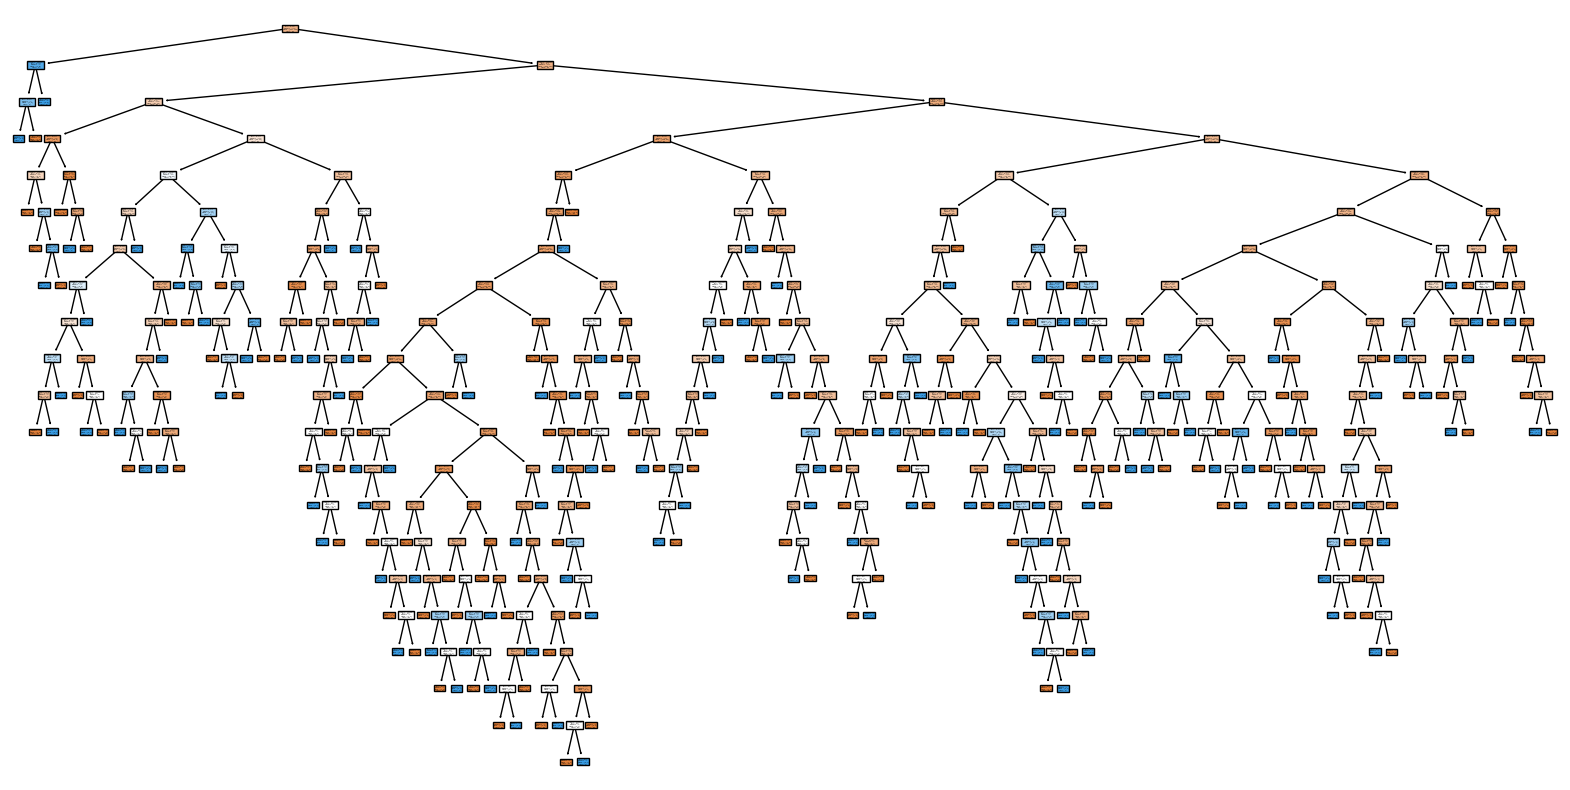

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['Edad', 'Ingreso'], class_names=['No', 'Sí'], filled=True)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.53
